# Problema 1

In [4]:
# Importamos las librerias a usar para el código y la gráfica
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

# Cargar los datos y poedimos nos los muestre
data = pd.read_csv('wine-clustering.csv')
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [7]:
# Cargamos los datos del vino de referencia que nos pide el ejercicio
wine_reference = {'Alcohol': 14, 'Malic_Acid': 2, 'Ash': 2.5, 'Ash_Alcanity': 16,
    'Magnesium': 115, 'Total_Phenols': 3, 'Flavanoids': 2.5,
    'Nonflavanoid_Phenols': 0.4, 'Proanthocyanins': 2,
    'Color_Intensity': 9, 'Hue': 1, 'OD280': 3.5, 'Proline': 800}

In [8]:
# Preparamos de datos
features = data.columns
X = data[features].values
reference = np.array([wine_reference[col] for col in features]).reshape(1, -1)
# Ahora estandarizamos para que todas las caracteristicas tengan la misma importancia
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
reference_scaled = scaler.transform(reference)

In [9]:
# Reducción de dimensionalidad para poder visualizar en 2 dimenciones todos los componentes del vino
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
ref_pca = pca.transform(reference_scaled)

In [11]:
# Aplicamos KNN usando el algoritmo de los K vecinos más cercanos (con K=5 como se nos solicita) para encontrar los vinos más similares al de referencia
knn = NearestNeighbors(n_neighbors=5, metric='euclidean')
knn.fit(X_scaled)
distances, indices = knn.kneighbors(reference_scaled)
# Mostramos los 5 vinos más similares con todas sus características, sus valores individuales de alcohol y el promedio calculado
similar_wines = data.iloc[indices[0]]
average_alcohol = similar_wines['Alcohol'].mean()
individual_alcohols = similar_wines['Alcohol'].values
similar_wines
# Posterior mostraremos los resultados en modo de resumen.

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
40,13.56,1.71,2.31,16.2,117,3.15,3.29,0.34,2.34,6.13,0.95,3.38,795
56,14.22,1.70,2.30,16.3,118,3.20,3.00,0.26,2.03,6.38,0.94,3.31,970
49,13.94,1.73,2.27,17.4,108,2.88,3.54,0.32,2.08,8.90,1.12,3.10,1260
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
20,14.06,1.63,2.28,16.0,126,3.00,3.17,0.24,2.10,5.65,1.09,3.71,780


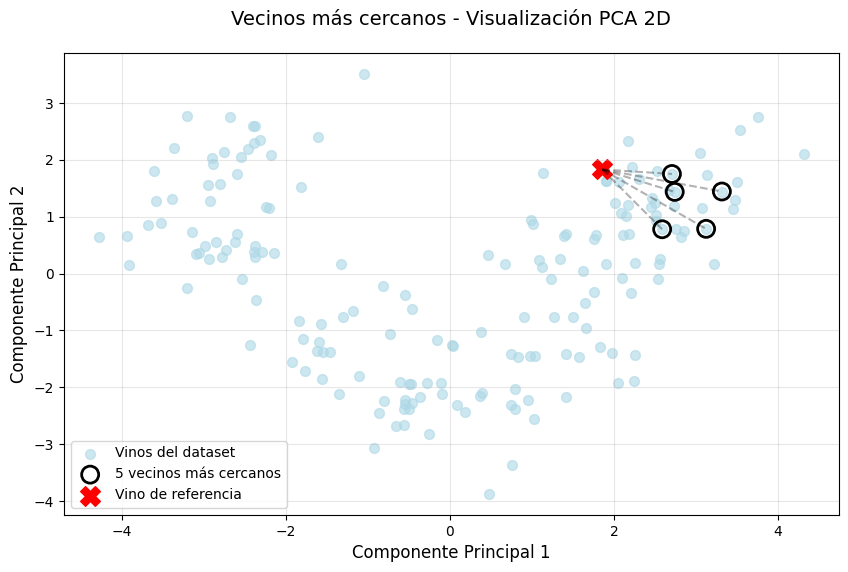

In [15]:
# Ahora definimos la gráfica
plt.figure(figsize=(10, 6))
plt.title("Vecinos más cercanos - Visualización PCA 2D", fontsize=14, pad=20)
plt.scatter(X_pca[:, 0], X_pca[:, 1], marker='o', s=50, color='lightblue', alpha=0.6, label='Vinos del dataset') # para mostrar todos los puntos
plt.scatter(X_pca[indices][0][:, 0], X_pca[indices][0][:, 1],marker='o', s=150, edgecolor='black', 
            facecolors='none', linewidth=2, label='5 vecinos más cercanos')# para mostrar los vecinos más cercanos
plt.scatter(ref_pca[0, 0], ref_pca[0, 1], marker='X', s=200, color='red', label='Vino de referencia') #Código para el punto de referencia
# Hacemos los conectores a los vecinos
for i in indices[0]:
    plt.plot([ref_pca[0, 0], X_pca[i, 0]], 
             [ref_pca[0, 1], X_pca[i, 1]], 
             'k--', alpha=0.3)
# Agregamos etiquetas
plt.xlabel('Componente Principal 1', fontsize=12)
plt.ylabel('Componente Principal 2', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)
plt.show()

In [24]:
# Ahora hacemos el resumen de forma númerica ayudandonos del código anterior
print("RESULTADOS DEL ANÁLISIS KNN")
print("-"*82)
print(f"\nContenido de alcohol en los 5 vinos más similares: {individual_alcohols}")
print(f"Promedio de alcohol: {average_alcohol:.2f}\n")
print("Características de los vinos similares:")
print(similar_wines[['Alcohol'] + list(features[1:])].to_string(index=False))

RESULTADOS DEL ANÁLISIS KNN
----------------------------------------------------------------------------------

Contenido de alcohol en los 5 vinos más similares: [13.56 14.22 13.94 14.23 14.06]
Promedio de alcohol: 14.00

Características de los vinos similares:
 Alcohol  Malic_Acid  Ash  Ash_Alcanity  Magnesium  Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  Hue  OD280  Proline
   13.56        1.71 2.31          16.2        117           3.15        3.29                  0.34             2.34             6.13 0.95   3.38      795
   14.22        1.70 2.30          16.3        118           3.20        3.00                  0.26             2.03             6.38 0.94   3.31      970
   13.94        1.73 2.27          17.4        108           2.88        3.54                  0.32             2.08             8.90 1.12   3.10     1260
   14.23        1.71 2.43          15.6        127           2.80        3.06                  0.28             2.29 

En la tabla anterior se muestran los vinos más similares y todas sus características, también los valores individuales de alcohol de estos vinos y el valor promedio de alcohol calculadoste promedio de alcohol nos dará una estimación del contenido alcohólico que podríamos esperar para un vino con características similares al que se nos solicita en el ejercicio.